1. Import and Data check
2. EDA
3. Feature Engineering
4. Modeling and Make submission

https://www.kaggle.com/code/kongnyooong/bike-sharing-demand-for-korean-beginners/notebook
커널 필사하기

# 1. Import and Data check

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

import missingno as msno
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")

mpl.rcParams['axes.unicode_minus']= False
%matplotlib inline

# importing basic module
# mlp.rcParams['axes.unicode_minus'] = False : 그래프에서 마이너스 폰트깨지는 문제에 대한 대처


In [2]:
os.listdir('../input/')

['bike-sharing-demand']

In [3]:
df_train = pd.read_csv('../input/bike-sharing-demand/train.csv')
df_test = pd.read_csv('../input/bike-sharing-demand/test.csv')

In [4]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather 
 - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

In [5]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
df_train.shape, df_test.shape

((10886, 12), (6493, 9))

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
# 요기에서 스플릿하지 않고 pd.to_datetime()함수 이용하여 데이터 타입을 datetime64형태로 변환
df_train['datetime'] = pd.to_datetime(df_train['datetime'])
df_test['datetime'] = pd.to_datetime(df_test['datetime'])

In [9]:
df_train.dtypes #dataframe.dtyps : 데이터컬럼들의 type확인

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [10]:
for col in df_train.columns:
    print('column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(df_train[col].isnull().sum() / df_train[col].shape[0])))

column:   datetime	 Percent of NaN value: 0.00%
column:     season	 Percent of NaN value: 0.00%
column:    holiday	 Percent of NaN value: 0.00%
column: workingday	 Percent of NaN value: 0.00%
column:    weather	 Percent of NaN value: 0.00%
column:       temp	 Percent of NaN value: 0.00%
column:      atemp	 Percent of NaN value: 0.00%
column:   humidity	 Percent of NaN value: 0.00%
column:  windspeed	 Percent of NaN value: 0.00%
column:     casual	 Percent of NaN value: 0.00%
column: registered	 Percent of NaN value: 0.00%
column:      count	 Percent of NaN value: 0.00%


In [11]:
for col in df_test.columns:
    print('column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(df_train[col].isnull().sum() / df_train[col].shape[0])))

column:   datetime	 Percent of NaN value: 0.00%
column:     season	 Percent of NaN value: 0.00%
column:    holiday	 Percent of NaN value: 0.00%
column: workingday	 Percent of NaN value: 0.00%
column:    weather	 Percent of NaN value: 0.00%
column:       temp	 Percent of NaN value: 0.00%
column:      atemp	 Percent of NaN value: 0.00%
column:   humidity	 Percent of NaN value: 0.00%
column:  windspeed	 Percent of NaN value: 0.00%


<AxesSubplot:>

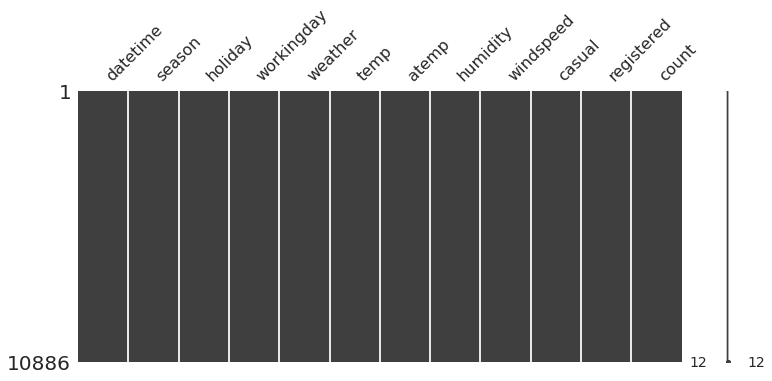

In [12]:
msno.matrix(df_train,figsize=(12,5))

# 2. EDA

### make new variable_  year, month,day, hour,minute,second

by divding datetime to year, month,day, hour,minute,second

extend the colum to 18

In [13]:
df_train['year'] = df_train['datetime'].dt.year
df_train['month'] = df_train['datetime'].dt.month
df_train['day'] = df_train['datetime'].dt.day
df_train['hour'] = df_train['datetime'].dt.hour
df_train['minute'] = df_train['datetime'].dt.minute
df_train['second'] = df_train['datetime'].dt.second

df_test['year'] = df_test['datetime'].dt.year
df_test['month'] = df_test['datetime'].dt.month
df_test['day'] = df_test['datetime'].dt.day
df_test['hour'] = df_test['datetime'].dt.hour
df_test['minute'] = df_test['datetime'].dt.minute
df_test['second'] = df_test['datetime'].dt.second

df_train.shape, df_test.shape

((10886, 18), (6493, 15))

### barplot : 각 기준별 대여량

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Rental amount by hour')]

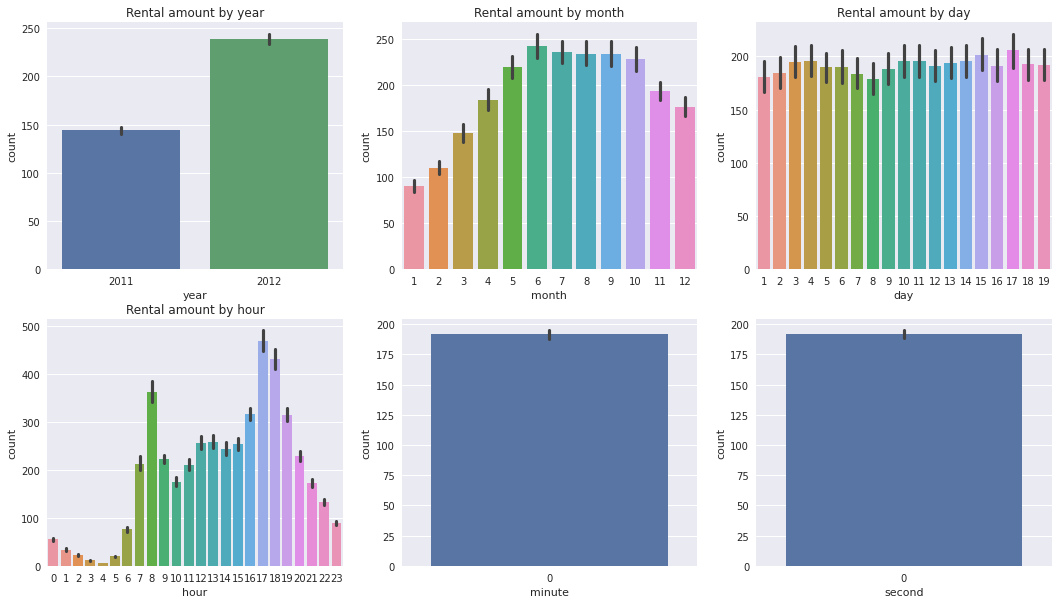

In [14]:
figure,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18,10)

sns.barplot(data=df_train, x='year',y='count',ax=ax1)
sns.barplot(data=df_train,x = 'month',y='count',ax=ax2)
sns.barplot(data=df_train,x='day',y='count',ax=ax3)
sns.barplot(data=df_train,x='hour',y='count',ax=ax4)
sns.barplot(data=df_train,x='minute',y='count',ax=ax5)
sns.barplot(data=df_train,x='second',y='count',ax=ax6)

ax1.set(ylabel='count',title='Rental amount by year')
ax2.set(ylabel='count',title='Rental amount by month')
ax3.set(ylabel='count',title='Rental amount by day')
ax4.set(ylabel='count',title='Rental amount by hour')



- 연도별 대여량을 보면 11년도보다 12년도에 자전거 대여량이 증가하였다.
- 월별 대여량을 확인해보면 6월에 가장 높고 그 후로 7,8,9월 즉 여름에 대여량이 많다는 것을 알 수 있다. 1,2월에 가장 대여량이적다.
- 일별 자젼거 대여량을 보면 1-19일까지 데이터만 있다는 것을 알 수 있다. 나머지는 test dataset에 있다고 함.
- 시간별 대여량을 보면 출퇴근 시간인 8시, 오후 5시-7시까지 대여량이 많다는 것을 확인해 볼 수 있다.


### make new variable as dayofweek_ 요일변수만들기

In [15]:
df_train['dayofweek'] = df_train["datetime"].dt.dayofweek # 0=mon,...,6=sun
df_test['dayofweek'] = df_test["datetime"].dt.dayofweek # 0=mon,...,6=sun

df_train.shape, df_test.shape

((10886, 19), (6493, 16))

In [16]:
df_train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

5,6 즉 토요일 일요일에 자전거 대여량이 가장많다.

### 시간의 흐름에 따라 pointplot을 그려준다.


<AxesSubplot:xlabel='hour', ylabel='count'>

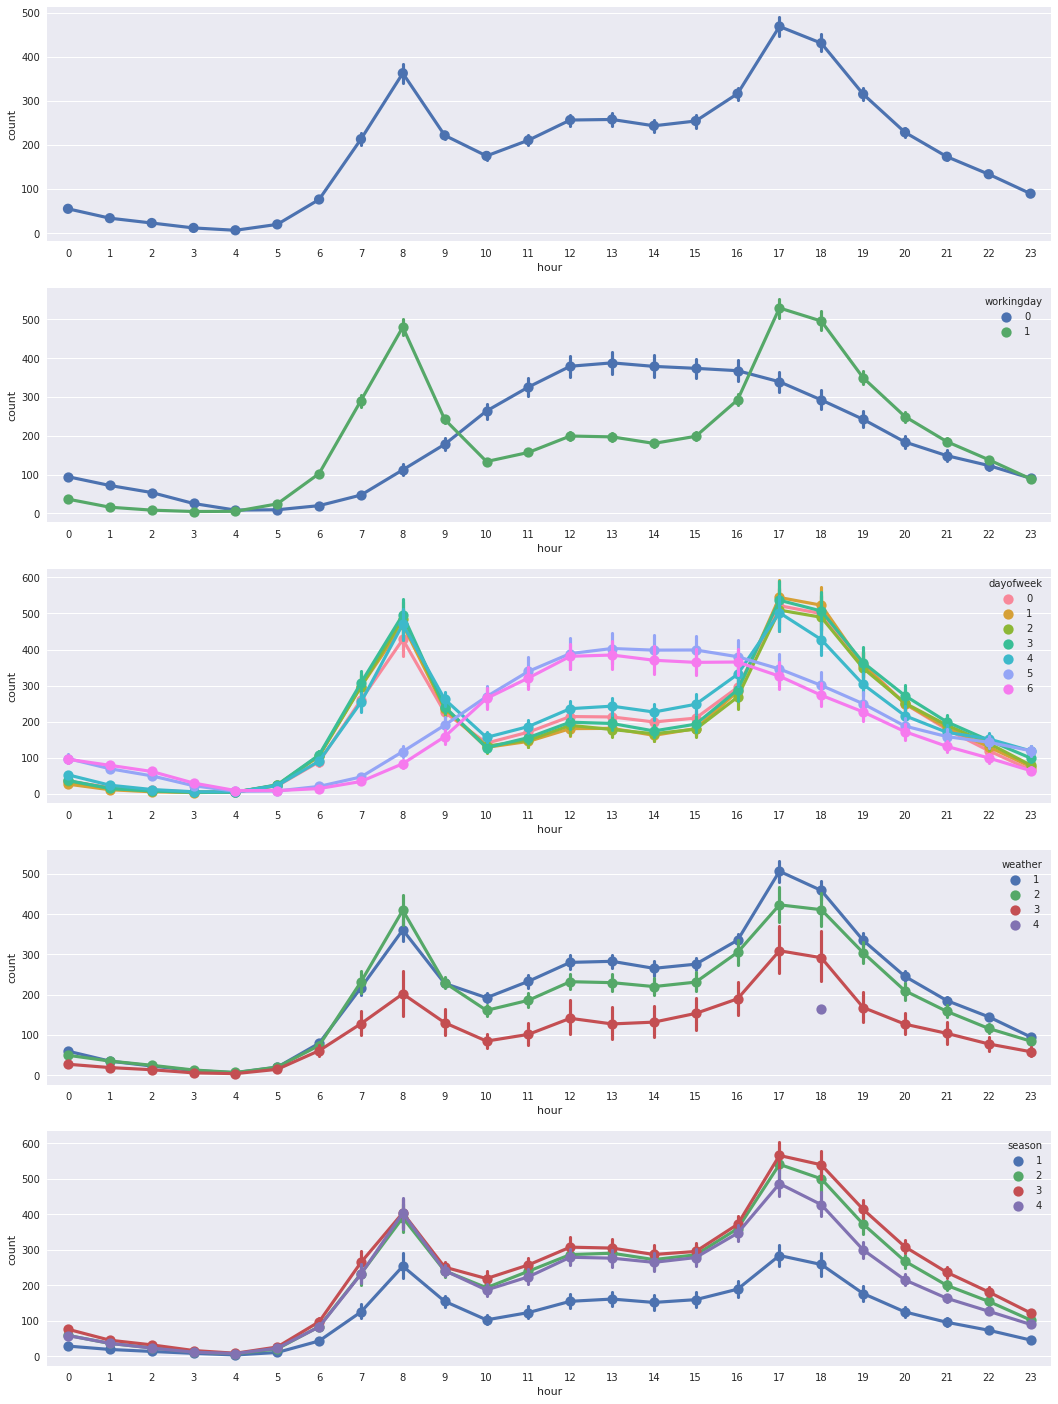

In [17]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows = 5)
fig.set_size_inches(18,25)

sns.pointplot(data=df_train, x = 'hour',y='count',ax=ax1)
sns.pointplot(data=df_train, x = 'hour',y='count',hue='workingday',ax=ax2)
sns.pointplot(data=df_train, x = 'hour',y='count',hue='dayofweek',ax=ax3)
sns.pointplot(data=df_train, x = 'hour',y='count',hue='weather',ax=ax4)
sns.pointplot(data=df_train, x = 'hour',y='count',hue='season',ax=ax5)

- 첫번째 plot은 앞의 결과와 같이 출퇴근 시간에 자전거 대여량이 많다는 것을 확인할 수 있다.
- 두번째 시간과, 자전거 이용횟수 count를 working날로 구분해서 시간에 따라 그려보면, working = 0 휴일은 낮시간에 사람이 많고 working = 1 일하는 날은 출퇴근 시간에 이용량이 많은 것을 볼 수 있다.
- 세번째 plot은 요일별로 자전거 이용횟수를 시간대별로 확인 해본 결과이다. 5,6 토요일 일요일에는 낮시간에 사람이 많지만, 평일은 출퇴근 시간에 이용량이 많다
- 네번째 plot은 날씨 별인데, 모두 출퇴근 시간에 많이 이용을 하였고, weather = 4인 악천후인 날은 자전거 이용이 거의 없다.
- 마지막 계절별로 찍은 plot은  봄의 이용객이 가장 적다는 것을 확인할 수 있다.


### heatmap _ Correlation of Numeric Features with Rental Count

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


<AxesSubplot:title={'center':'Correlation of Numeric Features with Rental Count'}>

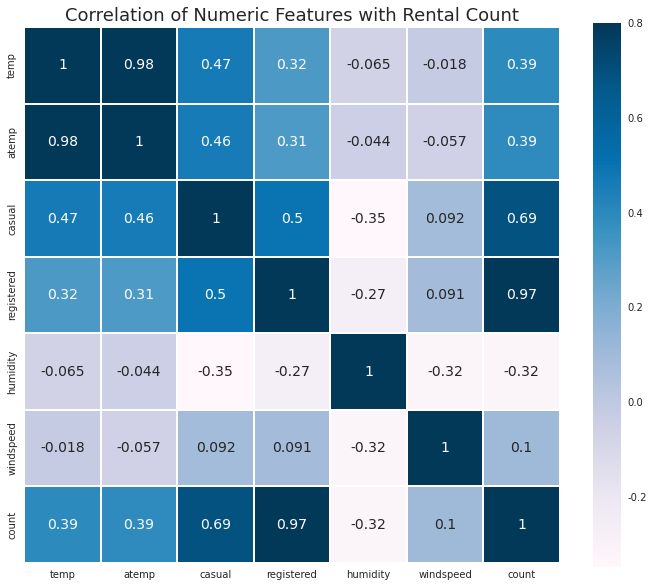

In [18]:
corr_data = df_train[['temp','atemp','casual','registered','humidity','windspeed','count']]
print(corr_data.corr())
colormap = plt.cm.PuBu

f,ax = plt.subplots(figsize=(12,10))
plt.title('Correlation of Numeric Features with Rental Count',y=1,size=18)
sns.heatmap(corr_data.corr(),vmax=0.8,linewidths=-.1,square=True,annot=True,cmap=colormap,linecolor='white',annot_kws = {'size':14})

- registed와 casual 변수가 count와 상관관계가 높다. 이 두 변수는 test dataset에는 없음
- temp,humidity, windspeed 같은 경우는 상관관계가 낮다
- temp, atemp는 다중공선성보임

### ScatterPlot _ 상관관계가 높지 않았던 temp,humidity, windspeed 변수들에 대해

<AxesSubplot:xlabel='humidity', ylabel='count'>

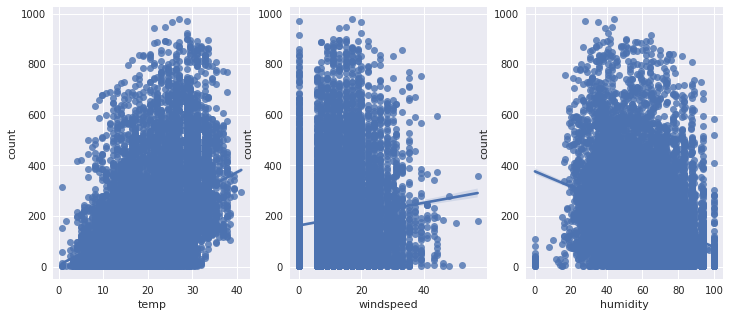

In [19]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols = 3,figsize=(12,5))

temp_scatter_plot = pd.concat([df_train['count'],df_train['temp']],axis=1)
sns.regplot(x='temp',y='count',data=temp_scatter_plot,scatter=True,fit_reg=True,ax=ax1)
#추세선과 함께 산점도 scatterplot 그릴려면 regplot

windspeed_scatter_plot = pd.concat([df_train['count'],df_train['windspeed']],axis=1)
sns.regplot(x='windspeed',y='count',data=windspeed_scatter_plot,scatter=True,fit_reg=True,ax=ax2)

humidity_scatter_plot = pd.concat([df_train['count'],df_train['humidity']],axis=1)
sns.regplot(x='humidity',y='count',data=humidity_scatter_plot,scatter=True,fit_reg=True,ax=ax3)

### CountPlot _ 'windspeed'에 대해서 시각화 :
0이 가장 많이 나타남. 풍속은 0으로 측정될 일 거의 불가능 할텐데->아마 missingvalue를 0으로 처리...!

<AxesSubplot:title={'center':'test windspeed'}, xlabel='windspeed', ylabel='count'>

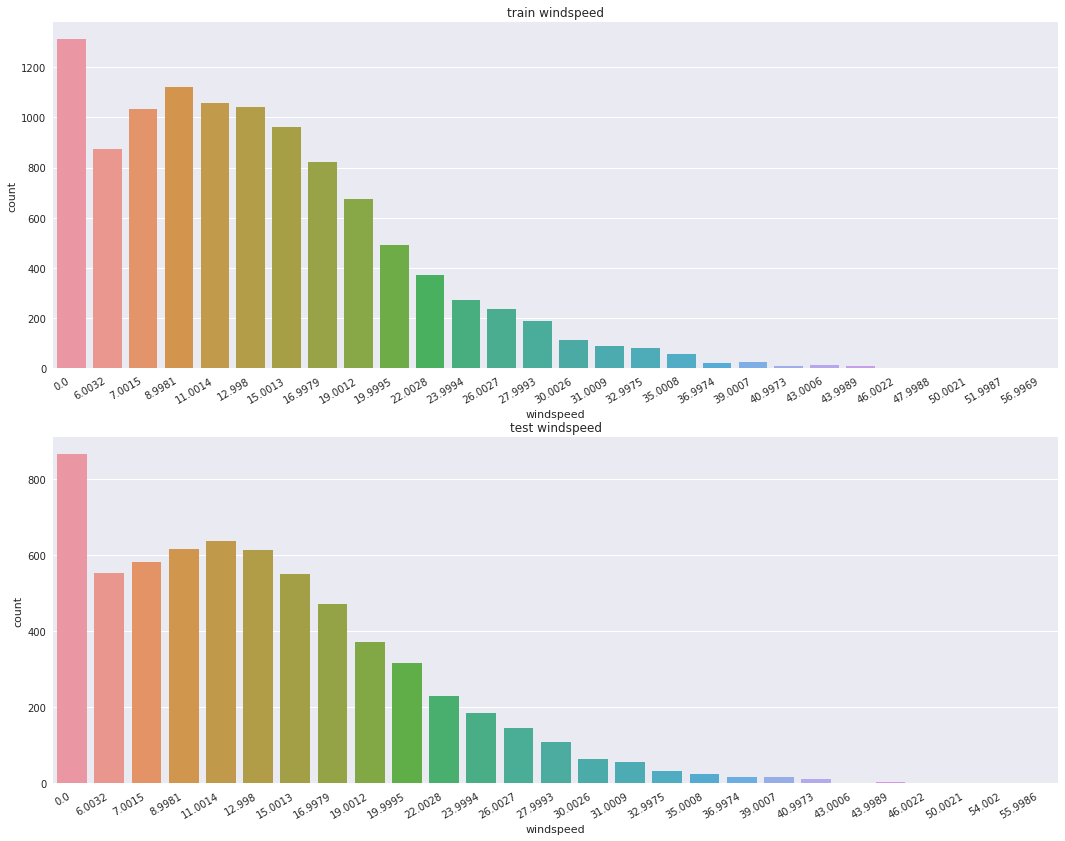

In [20]:
fig,axes = plt.subplots(nrows=2,figsize=(18,14))

plt.sca(axes[0])
plt.xticks(rotation = 30,ha = "right")
axes[0].set(ylabel="count",title='train windspeed')
sns.countplot(data=df_train,x = 'windspeed',ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation = 30,ha = "right")
axes[1].set(ylabel="count",title='test windspeed')
sns.countplot(data=df_test,x = 'windspeed',ax=axes[1])


### make new variable : year_month
연도별 월별 합쳐서 년도-월 변수를 만들어 barplot을 그린다.흐름을 본다.

In [21]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year,datetime.month)

df_train['year_month'] = df_train['datetime'].apply(concatenate_year_month)
df_test['year_month'] = df_test['datetime'].apply(concatenate_year_month)

print(df_train.shape)
df_train[['datetime','year_month']].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


<AxesSubplot:xlabel='year_month', ylabel='count'>

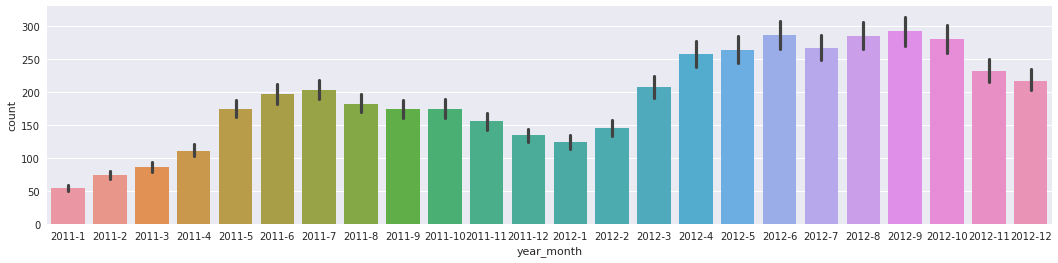

In [22]:
fig,ax = plt.subplots(figsize = (18,4))
sns.barplot(data=df_train,y='count',x='year_month')

년도 별로 6,7,8 여름에 많이 이용했지만, 전체적으로 증가 추세를 보여 11년도 보다는 12년도에 사용량이 많아 졌음을 알 수 있다.

### outlier 변수 골라내기 _ IQR을 이용

In [23]:
from collections import Counter 

def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
        
    return multiple_outliers
        
Outliers_to_drop = detect_outliers(df_train, 2, ["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"])
Outliers_to_drop
# train 데이터의 이상치를 탐색합니다.
# IQR(튜키의 방법)을 이용한 함수를 지정하여 이상치 탐색을 수행합니다.

[6658,
 6779,
 6825,
 6849,
 6850,
 6897,
 7088,
 7640,
 7641,
 7664,
 7881,
 8002,
 8024,
 8048,
 8049,
 8456,
 8768,
 8793,
 8794,
 8962,
 8984,
 8986,
 9008,
 9243,
 9244,
 9267,
 9296,
 9320,
 9392,
 9632,
 9652,
 9655,
 9800,
 9920,
 7017,
 7473,
 7991,
 8000,
 8528,
 9479]

In [24]:
df_train.loc[Outliers_to_drop]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,year_month
6658,2012-03-14 17:00:00,1,0,1,1,28.70,31.820,28,6.0032,140,642,782,2012,3,14,17,0,0,2,2012-3
6779,2012-03-19 18:00:00,1,0,1,1,26.24,31.060,57,16.9979,120,681,801,2012,3,19,18,0,0,0,2012-3
6825,2012-04-02 17:00:00,2,0,1,1,20.50,24.240,29,19.0012,128,601,729,2012,4,2,17,0,0,0,2012-4
6849,2012-04-03 17:00:00,2,0,1,1,25.42,30.305,17,12.9980,123,634,757,2012,4,3,17,0,0,1,2012-4
6850,2012-04-03 18:00:00,2,0,1,1,24.60,30.305,26,11.0014,139,661,800,2012,4,3,18,0,0,1,2012-4
6897,2012-04-05 17:00:00,2,0,1,1,20.50,24.240,31,11.0014,145,677,822,2012,4,5,17,0,0,3,2012-4
7088,2012-04-13 17:00:00,2,0,1,1,22.96,26.515,24,11.0014,117,621,738,2012,4,13,17,0,0,4,2012-4
7640,2012-05-17 17:00:00,2,0,1,1,27.06,31.060,31,8.9981,133,719,852,2012,5,17,17,0,0,3,2012-5
7641,2012-05-17 18:00:00,2,0,1,1,27.06,31.060,27,11.0014,134,734,868,2012,5,17,18,0,0,3,2012-5
7664,2012-05-18 17:00:00,2,0,1,1,27.06,31.060,34,8.9981,124,688,812,2012,5,18,17,0,0,4,2012-5


In [25]:
df_train = df_train.drop(Outliers_to_drop,axis = 0).reset_index(drop=True)
df_train.shape

(10846, 20)

### Skewness 왜도, Kurtosis 첨도 확인하기

In [26]:
df_train_num = df_train[["count", "temp", "atemp", "casual", "registered", "humidity", "windspeed"]]
df_train_num

,count,temp,atemp,casual,registered,humidity,windspeed
0,16,9.84,14.395,3,13,81,0.0000
1,40,9.02,13.635,8,32,80,0.0000
2,32,9.02,13.635,5,27,80,0.0000
3,13,9.84,14.395,3,10,75,0.0000
4,1,9.84,14.395,0,1,75,0.0000
...,...,...,...,...,...,...,...
10841,336,15.58,19.695,7,329,50,26.0027
10842,241,14.76,17.425,10,231,57,15.0013
10843,168,13.94,15.910,4,164,61,15.0013
10844,129,13.94,17.425,12,117,61,6.0032


In [27]:
for col in df_train_num:
    print('{:15}'.format(col),
          'Skewness: {:05.2f}'.format(df_train[col].skew()), '    ',
          'Kurtosis: {:06.2f}'.format(df_train[col].kurt()))

count           Skewness: 01.21      Kurtosis: 001.20
temp            Skewness: 00.01      Kurtosis: -00.91
atemp           Skewness: -0.10      Kurtosis: -00.85
casual          Skewness: 02.52      Kurtosis: 007.74
registered      Skewness: 01.51      Kurtosis: 002.61
humidity        Skewness: -0.09      Kurtosis: -00.76
windspeed       Skewness: 00.58      Kurtosis: 000.63


### 각 변수별 Boxplox Plot 그리기

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Rental count by minute')]

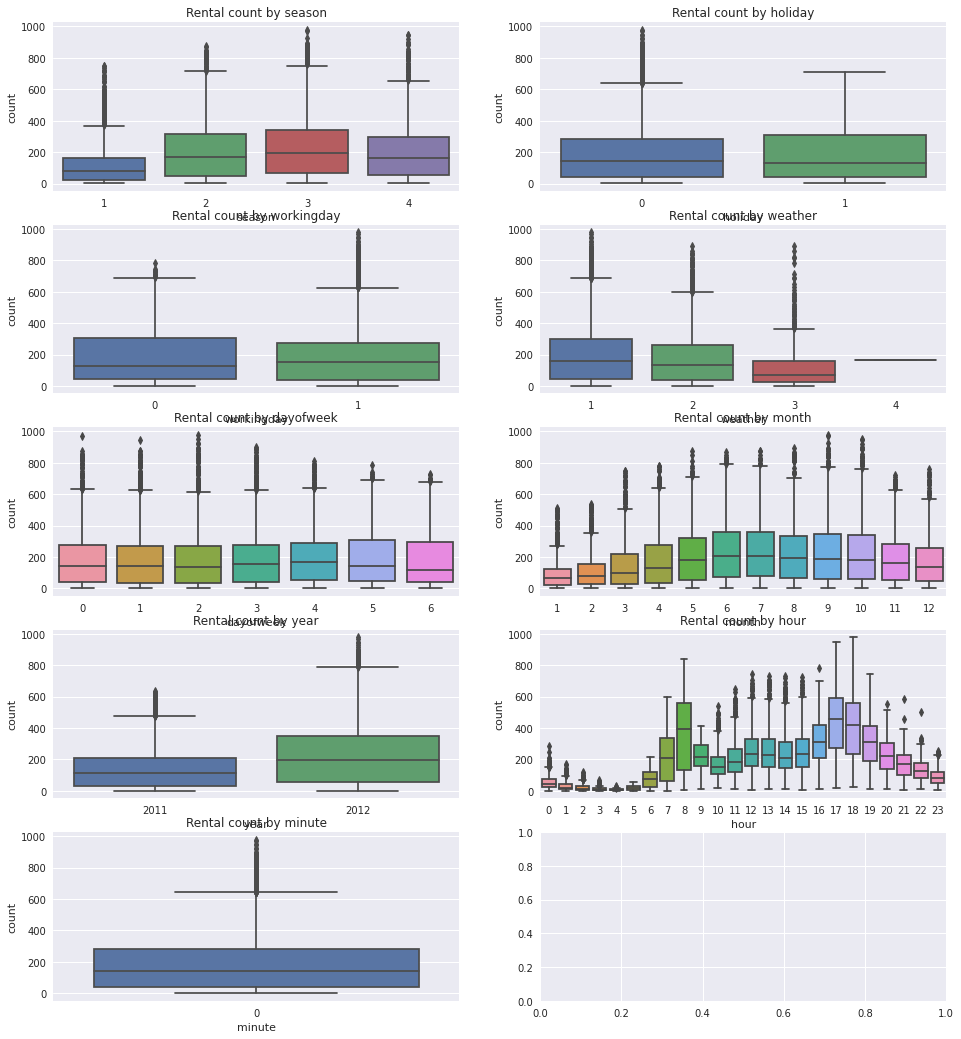

In [28]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize=(16, 18))
sns.boxplot(data = df_train, y="count", x = "season", orient = "v", ax = axes[0][0])
sns.boxplot(data = df_train, y="count", x = "holiday", orient = "v", ax = axes[0][1])
sns.boxplot(data = df_train, y="count", x = "workingday", orient = "v", ax = axes[1][0])
sns.boxplot(data = df_train, y="count", x = "weather", orient = "v", ax = axes[1][1])
sns.boxplot(data = df_train, y="count", x = "dayofweek", orient = "v", ax = axes[2][0])
sns.boxplot(data = df_train, y="count", x = "month", orient = "v", ax = axes[2][1])
sns.boxplot(data = df_train, y="count", x = "year", orient = "v", ax = axes[3][0])
sns.boxplot(data = df_train, y="count", x = "hour", orient = "v", ax = axes[3][1])
sns.boxplot(data = df_train, y="count", x = "minute", orient = "v", ax = axes[4][0])

axes[0][0].set(ylabel = "count", title = "Rental count by season")
axes[0][1].set(ylabel = "count", title = "Rental count by holiday")
axes[1][0].set(ylabel = "count", title = "Rental count by workingday")
axes[1][1].set(ylabel = "count", title = "Rental count by weather")
axes[2][0].set(ylabel = "count", title = "Rental count by dayofweek")
axes[2][1].set(ylabel = "count", title = "Rental count by month")
axes[3][0].set(ylabel = "count", title = "Rental count by year")
axes[3][1].set(ylabel = "count", title = "Rental count by hour")
axes[4][0].set(ylabel = "count", title = "Rental count by minute")

# 3. Feature Engineering

### check Skewness and Kurtosis

Skewness:  1.210923
Kurtosis:  1.200871


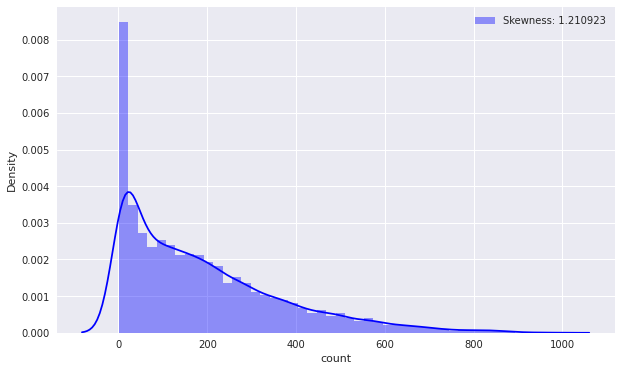

In [29]:
f,ax = plt.subplots(1,1,figsize=(10,6))
g = sns.distplot(df_train['count'], color='b',label = 'Skewness: {:2f}'.format(df_train['count'].skew()),ax=ax)
g = g.legend(loc="best")
print("Skewness: % f" % df_train['count'].skew())
print("Kurtosis: % f" % df_train['count'].kurt())

output 변수인 count변수는 정규분포를 따르면 더 정확한 결과가 나오기 때문에
log를 취함으로 정규화 시켜준다.

치우침 해소를 위해서 log를 취하고 다시 한번 확인 -> count 변수 버리고 log취한 count_Log로 대체

Skewness: -0.975198
Kurtosis:  0.247435


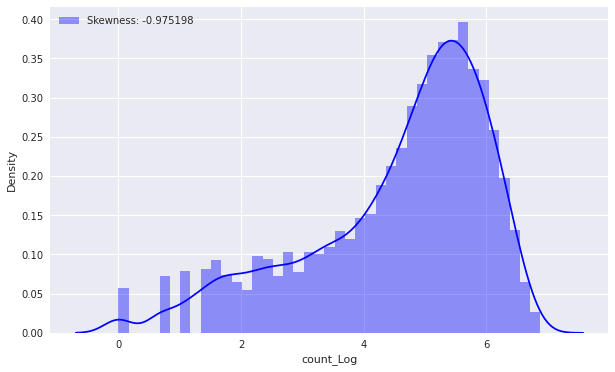

In [30]:
df_train['count_Log'] = df_train['count'].map(lambda i :np.log(i) if i>0 else 0)

f,ax = plt.subplots(1,1,figsize=(10,6))
g = sns.distplot(df_train['count_Log'], color='b',label = 'Skewness: {:2f}'.format(df_train['count_Log'].skew()),ax=ax)
g = g.legend(loc="best")
print("Skewness: % f" % df_train['count_Log'].skew())
print("Kurtosis: % f" % df_train['count_Log'].kurt())

df_train.drop('count',axis = 1,inplace=True)

### dealing with missing values 0 _ windspeed

먼저 windspeed == 0인것과 windspeed !=0인 것을 분리해준다.

In [31]:
trainWind0 = df_train.loc[df_train['windspeed'] == 0]
trainWind1 = df_train.loc[df_train['windspeed'] != 0]

이제 randomForest 로 풍속이 0인것과 0이 아닌 것을 예측한 후에, 0인 것 대체해주기

In [32]:
from sklearn.ensemble import RandomForestClassifier
# RandomForest로 값을 예측해보도록 합니다.
def predict_windspeed(data):
    dataWind0 = data.loc[data["windspeed"] == 0]
    dataWindNot0 = data.loc[data["windspeed"] != 0]
    # 풍속 데이터를 0인 값과 아닌 값들로 나눠줍니다.
    wcol = ["season", "weather", "humidity", "day", "temp", "atemp"]
    # 예측에 필요한 변수들을 지정합니다.
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")
    # 풍속이 0이 아닌 값들을 string데이터로 변환합니다.
    rf_wind = RandomForestClassifier()
    rf_wind.fit(dataWindNot0[wcol], dataWindNot0["windspeed"])
    wind0 = rf_wind.predict(X=dataWind0[wcol])
    # 랜덤포레스트를 사용하여 wcol의 변수들로 0인 값들을 학습시키고 예측합니다.
    
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0
    # 예측한 값을 넣어줄 데이터프레임을 만듭니다.
    predictWind0["windspeed"] = wind0
    # 예측값들을 넣어줍니다.
    data = predictWindNot0.append(predictWind0)
    # 0이 아닌 데이터들과 예측값들을 합쳐줍니다.
    data["windspeed"] = data["windspeed"].astype("float")
    # 풍속의 데이터들을 다시 float 타입으로 변환합니다.
    data.reset_index(inplace = True)
    data.drop("index", inplace = True, axis = 1)
    
    return data

<AxesSubplot:xlabel='windspeed', ylabel='count'>

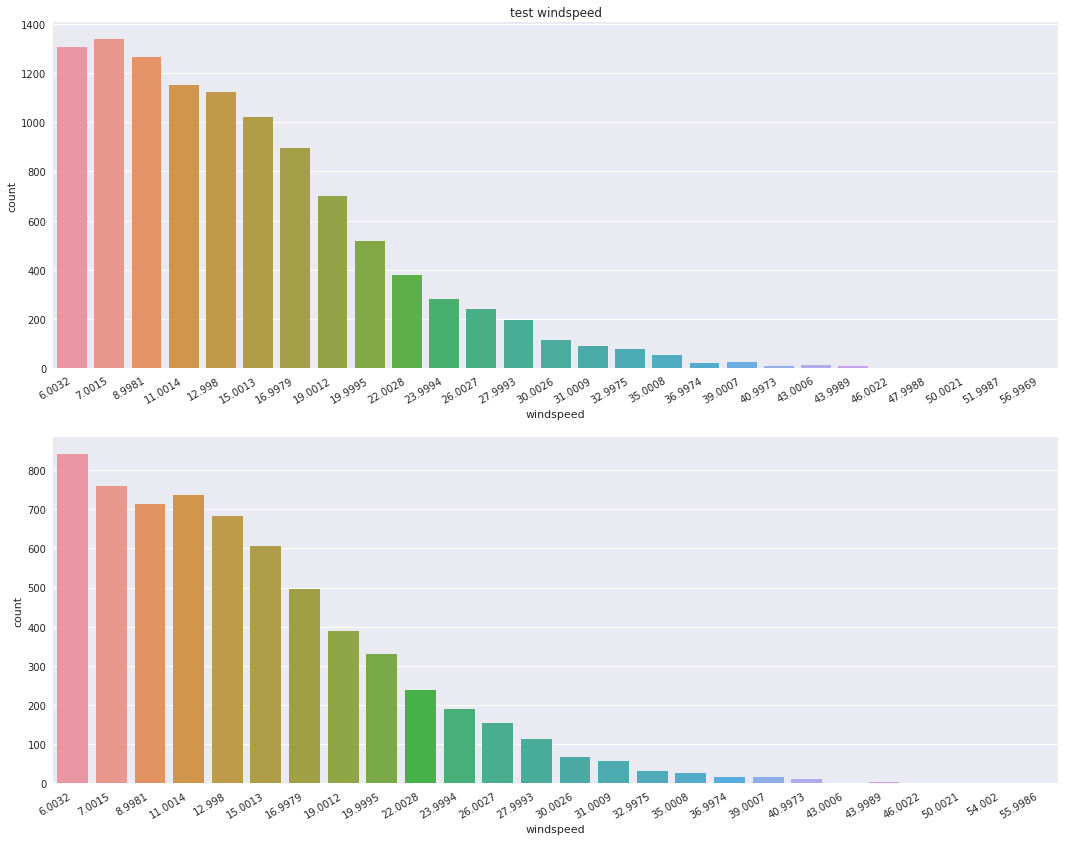

In [33]:
df_train = predict_windspeed(df_train)
df_test = predict_windspeed(df_test)

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (18,14))

plt.sca(ax1)
plt.xticks(rotation = 30, ha = "right")
ax1.set(ylabel = "count", title = "train windspeed")
sns.countplot(data = df_train, x = "windspeed", ax = ax1)

plt.sca(ax2)
plt.xticks(rotation = 30, ha = "right")
ax1.set(ylabel = "count", title = "test windspeed")
sns.countplot(data = df_test, x = "windspeed", ax = ax2)

# 예측된 풍속데이터 시각화, rotation은 글씨의 각도 조절 파라미

In [34]:
corr_data = df_train[["count_Log", "windspeed"]]
corr_data.corr()

,count_Log,windspeed
count_Log,1.000000,0.125181
windspeed,0.125181,1.000000


### 'weather','season' 명목형 변수들에 대해 onehotencoding

In [35]:
df_train = pd.get_dummies(df_train, columns = ["weather"], prefix = "weather")
df_test = pd.get_dummies(df_test, columns = ["weather"], prefix = "weather")

df_train = pd.get_dummies(df_train, columns = ["season"], prefix = "season")
df_test = pd.get_dummies(df_test, columns = ["season"], prefix = "season")

### 완성된 데이터 정리

In [36]:
datetime_test = df_test['datetime']

df_train.drop(["datetime", "registered","casual","holiday", "year_month", "minute", "second"], axis = 1, inplace = True)
df_test.drop(["datetime","holiday", "year_month", "minute", "second"], axis = 1, inplace = True)

In [37]:
df_train.head()

,workingday,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek,count_Log,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
0,0,9.84,12.880,75,6.0032,2011,1,1,5,5,0.000000,0,1,0,0,1,0,0,0
1,0,15.58,19.695,76,16.9979,2011,1,1,10,5,3.583519,1,0,0,0,1,0,0,0
2,0,14.76,16.665,81,19.0012,2011,1,1,11,5,4.025352,1,0,0,0,1,0,0,0
3,0,17.22,21.210,77,19.0012,2011,1,1,12,5,4.430817,1,0,0,0,1,0,0,0
4,0,18.86,22.725,72,19.9995,2011,1,1,13,5,4.543295,0,1,0,0,1,0,0,0


In [38]:
df_test.head()

,workingday,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
0,1,10.66,11.365,56,26.0027,2011,1,20,0,3,1,0,0,0,1,0,0,0
1,1,10.66,12.880,56,11.0014,2011,1,20,3,3,1,0,0,0,1,0,0,0
2,1,10.66,12.880,56,11.0014,2011,1,20,4,3,1,0,0,0,1,0,0,0
3,1,9.84,11.365,60,15.0013,2011,1,20,5,3,1,0,0,0,1,0,0,0
4,1,9.02,10.605,60,15.0013,2011,1,20,6,3,1,0,0,0,1,0,0,0


# 4. Model and Make Submission

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train = df_train.drop('count_Log',axis = 1).values
target_label = df_train['count_Log'].values
X_test = df_test.values
X_tr,X_vld,y_tr,y_vld = train_test_split(X_train,target_label,test_size = 0.2,random_state = 2000)


In [40]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(n_estimators = 2000,
                                      learning_rate = 0.05,
                                      max_depth = 4,min_samples_leaf = 15
                                      ,min_samples_split = 10,
                                      random_state=42)
regressor.fit(X_tr,y_tr)


GradientBoostingRegressor(learning_rate=0.05, max_depth=4, min_samples_leaf=15,
                          min_samples_split=10, n_estimators=2000,
                          random_state=42)

훈련시키기

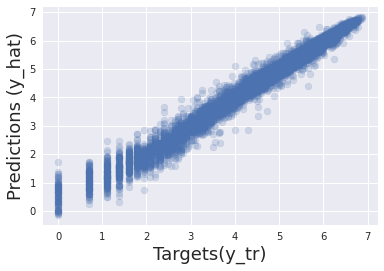

In [41]:
y_hat = regressor.predict(X_tr)
plt.scatter(y_tr,y_hat,alpha=0.2)
plt.xlabel('Targets(y_tr)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

훈련시킨 데이터 validation set으로 잘 예측 되는지 확인하기

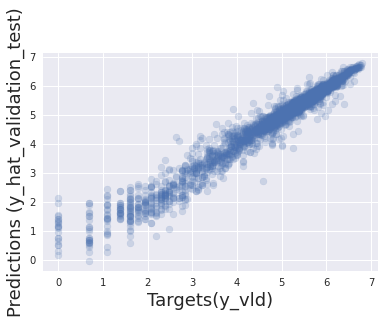

In [42]:
y_hat_validation_test = regressor.predict(X_vld)
plt.scatter(y_vld,y_hat_validation_test,alpha=0.2)
plt.xlabel('Targets(y_vld)',size=18)
plt.ylabel('Predictions (y_hat_validation_test)',size=18)
plt.show()

#### 모델평가하기

training으로 fitting한 regression모델 validation set으로 테스트한 결과의 RMSLE값 구하기

(MSE에 루트씌운값 : RMSLE)

In [43]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

models=[GradientBoostingRegressor()]
model_names=['regressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_tr,y_tr)
    test_pred=clf.predict(X_vld)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_vld)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
d

{'Modelling Algo': ['regressor'], 'RMSLE': [0.13226717519479722]}

### cross validation 하기

**cross validation** : 고정된 train set과 test set으로 평가를 하고, 반복적으로 모델을 튜닝하다보면 test set에만 과적합되어버리는 결과가 생긴다. 이를 해결하고자 하는 것

test set이 데이터 중 일부분으로 고정되어 있고, 이 일부분의 데이터 셋에 대하여 성능이 잘 나오도록 파라미터를 반복적으로 튜닝하여 overfitting문제 발생.

cross validation은 데이터의 모든 부분을 사용하여 모델을 검증하고, test set을 하나로 고정하지 않는다. 

전체 데이터 셋을 k개의 subset으로 나누고 k번의 평가를 실행하는데, 이 때 test set을 중복 없이 바꾸어가면서 평가를 진행

In [44]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = regressor, X = X_tr, y = y_tr, cv = 8)

In [45]:
print(accuracies.mean()) 
print(accuracies.std())

0.9566154866058306
0.0037284026517095717


### 구한 모델로 X_test(test셋, count값 없는데 우리가 예측해야해)
로그 씌었으니까 exp로 반환하자

In [46]:
use_logvals = 1 

pred_xgb = regressor.predict(X_test) 

sub_xgb = pd.DataFrame() 
sub_xgb['datetime'] = datetime_test 
sub_xgb['count'] = pred_xgb 
if use_logvals == 1:
    sub_xgb['count'] = np.exp(sub_xgb['count'])
    
sub_xgb.to_csv('xgb.csv',index=False)